<a href="https://colab.research.google.com/github/robertoalotufo/ia898/blob/master/master/tutorial_numpy_1_5a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# download image from github: -q quiet mode; -N overwrite on the next download
!wget -q -N https://github.com/robertoalotufo/ia898/raw/830a0f5f6e6a1ddd459127631bf9c0c750bf1f58/data/cameraman.tif
!wget -q -N https://github.com/robertoalotufo/ia898/raw/830a0f5f6e6a1ddd459127631bf9c0c750bf1f58/data/keyb.tif
!wget -q -N https://github.com/robertoalotufo/ia898/raw/830a0f5f6e6a1ddd459127631bf9c0c750bf1f58/figures/versicolor.jpg
!wget -q -N https://github.com/robertoalotufo/rnap/raw/master/figures/Iris_versicolor.jpg


# Introdução ao NumPy - Redução de eixo

## Operação combinando todos os pixels

Existem várias funções que calculam valores estatísticos da imagem, como valor máximo, valor médio, 
soma, entre outras, que permitem sua aplicação em todos os elementos do array, resultando num valor escalar único, ou aplicando apenas em algumas dimensões do array.

Quando esses métodos não tem parâmetros, a operação é aplicada em todos os eixos (reduzindo todos os eixos) resultando num valor escalar:

In [2]:
from PIL import Image

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np


In [3]:

a = np.array(Image.open('cameraman.tif'))[100:100+15,50:50+20]
print("a = \n", a)
print('a.max()=',  a.max())
print('a.mean()=', a.mean())
print('a.sum()=',  a.sum())

a = 
 [[18 14 16 17 19 18 17 20 20 22 22 22 10  9  6  7  7  8  8  9]
 [16 13 20 18 17 19 15 21 20 19 18 19 17 16 11 11  8  8  9  9]
 [16 14 17 18 17 12  8 19 19 16 21 15 17 16 15 13  8  8  7  7]
 [17 20 13 15 11  9 12 17 16 18 16 14 15 16 16 21 15  7  4  5]
 [14 17 13 10  8  9 14 16 14 18 13 14 13 17 18 19 18 18  5  3]
 [14 17 12 74 41 18 12 14 16 11 13 14 15 17 17 15 19 21 19  9]
 [10 22 12 27 35 19 15 14 15 10 12 13 14 14 16 18 22 20 19 20]
 [ 2  8 17  4  6  9 16 13 11 14 12 12 16 18 18 16 22 21 18 19]
 [ 2  2  8 14  7 13 16 14 12 16 15 15 18 17 17 15 20 19 21 17]
 [ 2  2  3  7 19 19 20 14 15 15 16 17 18 19 18 16 18 18 17 17]
 [ 2  2  1  2  4 15 20 15 18 14 15 11 11 13 15 17 18 18 15 16]
 [ 8  4  1  1  2  3  8 13 14  9 10  8  7 10 14 16 17 17 17 20]
 [10 10  5  5  2  2  5  8  6  5  5  5  7 10 14 15 15 15 16 18]
 [ 7  7  7  7  4  4  5  5  4  3  4  8  9 12 13 13 14 13 15 17]
 [ 4  4  4  4  3  4  4  3  4  6  7 10 12 11 13 12 13 14 14 19]]
a.max()= 74
a.mean()= 13.18
a.sum()= 3954


A título de curiosidade, em processamento paralelo, fazer este tipo de operação, que acumula um 
único valor a partir dos valores de cada pixel é uma das operações mais ineficientes, pois
existe o gargalo que todos os pixels precisam ser acumulados numa única variável. Este tipo
de operação, em processamento paralelo, é denominada ``redução``, pois você reduz todos os
elementos do ``ndarray`` a um único valor.

## Operação combinando eixos (redução de eixo)
    
É possível também fazer estas operações que combinam os pixels, apenas em alguns eixos, isto é 
denominado redução de eixo. Para se conseguir isto, basta utilizar como parâmetro da função
usada para a combinação dos valores o eixo em que os valores serão calculados. Assim, se a
imagem for bidimensional, eixos 0 (linhas) e 1 (colunas), se quisermos combinar na direção
das linhas utilizamos 0 como parâmetro e se quisermos acumular na direção das colunas, utilizamos
um como parâmetro. Existem vários métodos que podem ser utilizados.
Vejamos os exemplos a seguir:
    

In [4]:
print('a =\n',a)
print('a.shape = ', a.shape)
print('a.max(axis=0) = ', a.max(0))
print('a.max(axis=0).shape = ', a.max(0).shape)
print('a.max(axis=1) = ', a.max(1))
print('a.max(axis=1).shape = ', a.max(1).shape)

a =
 [[18 14 16 17 19 18 17 20 20 22 22 22 10  9  6  7  7  8  8  9]
 [16 13 20 18 17 19 15 21 20 19 18 19 17 16 11 11  8  8  9  9]
 [16 14 17 18 17 12  8 19 19 16 21 15 17 16 15 13  8  8  7  7]
 [17 20 13 15 11  9 12 17 16 18 16 14 15 16 16 21 15  7  4  5]
 [14 17 13 10  8  9 14 16 14 18 13 14 13 17 18 19 18 18  5  3]
 [14 17 12 74 41 18 12 14 16 11 13 14 15 17 17 15 19 21 19  9]
 [10 22 12 27 35 19 15 14 15 10 12 13 14 14 16 18 22 20 19 20]
 [ 2  8 17  4  6  9 16 13 11 14 12 12 16 18 18 16 22 21 18 19]
 [ 2  2  8 14  7 13 16 14 12 16 15 15 18 17 17 15 20 19 21 17]
 [ 2  2  3  7 19 19 20 14 15 15 16 17 18 19 18 16 18 18 17 17]
 [ 2  2  1  2  4 15 20 15 18 14 15 11 11 13 15 17 18 18 15 16]
 [ 8  4  1  1  2  3  8 13 14  9 10  8  7 10 14 16 17 17 17 20]
 [10 10  5  5  2  2  5  8  6  5  5  5  7 10 14 15 15 15 16 18]
 [ 7  7  7  7  4  4  5  5  4  3  4  8  9 12 13 13 14 13 15 17]
 [ 4  4  4  4  3  4  4  3  4  6  7 10 12 11 13 12 13 14 14 19]]
a.shape =  (15, 20)
a.max(axis=0) =  [18 22 20 74

Note que a matriz possui 2 dimensões denominados eixos 0 e 1: (15,20) 15 linhas e 20 colunas. ``a.max(0)`` opera no eixo das linhas, reduzindo o eixo 0, ficando apenas o eixo 1: 20 elementos que serão os valores máximos de cada coluna. Note que o shape foi reduzido de (15,20) para (20,), pois a
operação se deu reduzindo o eixo 0.

Já o ``a.max(1)`` opera na direção do eixo nas colunas, resultando o máximo em cada linha. 
O shape reduziu de (15,20) para (15,).

## Outros exemplos numéricos

A seguir outros exemplos reduzindo o eixo 0 (linhas). Em todos os exemplos a seguir, como a redução
se dá no eixo 0, o vetor resultante terá shape (4,), pois o eixo 0 do shape (5,4) de ``a``.

In [5]:
print('a =\n',a)
print('a.mean(axis=0) = ', a.mean(0))
print('a.min(axis=0) = ', a.min(0))
print('a.sum(axis=0) = ', a.sum(0))

a =
 [[18 14 16 17 19 18 17 20 20 22 22 22 10  9  6  7  7  8  8  9]
 [16 13 20 18 17 19 15 21 20 19 18 19 17 16 11 11  8  8  9  9]
 [16 14 17 18 17 12  8 19 19 16 21 15 17 16 15 13  8  8  7  7]
 [17 20 13 15 11  9 12 17 16 18 16 14 15 16 16 21 15  7  4  5]
 [14 17 13 10  8  9 14 16 14 18 13 14 13 17 18 19 18 18  5  3]
 [14 17 12 74 41 18 12 14 16 11 13 14 15 17 17 15 19 21 19  9]
 [10 22 12 27 35 19 15 14 15 10 12 13 14 14 16 18 22 20 19 20]
 [ 2  8 17  4  6  9 16 13 11 14 12 12 16 18 18 16 22 21 18 19]
 [ 2  2  8 14  7 13 16 14 12 16 15 15 18 17 17 15 20 19 21 17]
 [ 2  2  3  7 19 19 20 14 15 15 16 17 18 19 18 16 18 18 17 17]
 [ 2  2  1  2  4 15 20 15 18 14 15 11 11 13 15 17 18 18 15 16]
 [ 8  4  1  1  2  3  8 13 14  9 10  8  7 10 14 16 17 17 17 20]
 [10 10  5  5  2  2  5  8  6  5  5  5  7 10 14 15 15 15 16 18]
 [ 7  7  7  7  4  4  5  5  4  3  4  8  9 12 13 13 14 13 15 17]
 [ 4  4  4  4  3  4  4  3  4  6  7 10 12 11 13 12 13 14 14 19]]
a.mean(axis=0) =  [ 9.46666667 10.4         9.933

## Redução no eixo com aplicações em imagens

No exemplo abaixo, calculamos o perfil médio das colunas numa imagem que 
representa um recorte de uma parte de uma calculadora.

O perfil médio dos pixels é calculado com a operação de ``mean(0)`` para se fazer a redução
da dimensão 0 (linhas). Veja a interpretação da curva no gráfico. As teclas são escuras, porém as
letras são bem claras dando um valor médio 
mais baixo que o fundo das teclas que possui um nível de cinza maior. Observe que ``mean(0)``
irá calcular a média de cada coluna, assim, o ``hmean[0]`` abaixo será a média de todos os pixels
da primeira coluna, o ``hmean[1]``, a média de todos os pixels da segunda coluna de ``f`` e 
assim por diante. Veja que a operação sendo na direção das linhas (eixo 0), podemos interpretar
que o resultado é uma linha horizontal média da imagem ou é uma linha onde cada elemento é a
média dos pixels de cada coluna da imagem.  

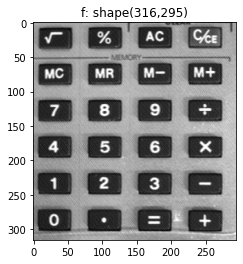

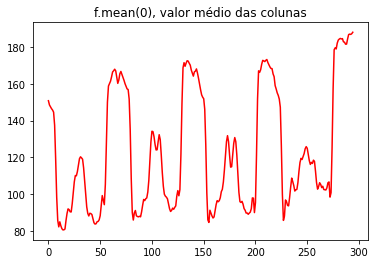

In [6]:
f = mpimg.imread('keyb.tif')
plt.figure(0)
plt.imshow(f,cmap='gray'); plt.title('f: shape(%d,%d)' % (f.shape[0], f.shape[1]))
hmean = f.mean(axis=0)
plt.figure(1)
plt.plot(hmean,color='r')
plt.ylabel='intensidade'
plt.xlabel='coluna'
plt.title('f.mean(0), valor médio das colunas');

Veja o exemplo similar, mas agora calculando os valores mínimos das colunas. 

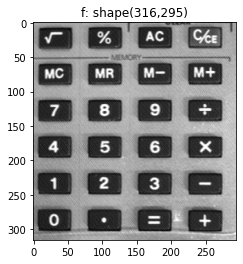

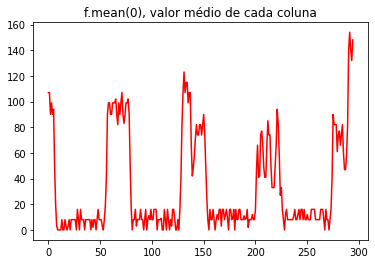

In [7]:
f = mpimg.imread('keyb.tif')
plt.figure(0)
plt.imshow(f,cmap='gray'); plt.title('f: shape(%d,%d)' % (f.shape[0], f.shape[1]))
hmin = f.min(axis=0)
plt.figure(1)
plt.plot(hmin,color='r')
plt.ylabel='intensidade'
plt.xlabel='coluna'
plt.title('f.mean(0), valor médio de cada coluna');

Veja agora uma imagem colorida com 3 dimensões: altura, largura, canais:

In [8]:
from PIL import Image

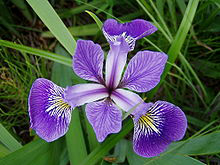

In [9]:
img_pil = Image.open('Iris_versicolor.jpg')
img_pil

In [13]:
img = np.array(img_pil)
img.shape, img.min(), img.max()

((165, 220, 3), 0, 255)

In [37]:
img_c = img.transpose(2,0,1)
img_c.shape

(3, 165, 220)

A imagem possui 3 dimensões: dimensão 0: 165 linhas; dimensào 1: 220 colunas; dimensão 3: 3 canais RGB

In [11]:
# Mostrar os canais R, G, B como imagens monocromáticas individuais
# Calcular o valor médio de cada um dos canais RGB
# Calcular a imagem média dos 3 canais -> resultado é uma imagem em niveis de cinza de 2 dimensões (165,220)

# 